![alt text](Neune-logo.png "Neuneworks")

**Problem Statement:**
*Neuneworks*  is an AI startup that focuses on AI-related projects and operates a YouTube channel dedicated to creating content around AI. Their videos explore various topics, including AI careers and insights into leading AI businesses.  The startup wants to *analyze viewer engagement* to understand which types of content resonate most with their audience. To achieve this, they aim to develop a machine learning model that can predict the category of a video, helping them to identify which videos are likely to attract the most views upon publication.

In [405]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [401]:
data = pd.read_csv('neuneworksytcanalytics.csv')

In [327]:
data.head()

,Content,Video title,Video publish time,Duration,Engaged views,Average view duration,Average percentage viewed (%),Unique viewers,Stayed to watch (%),Average views per viewer,...,End screen element clicks,End screen elements shown,Clicks per end screen element shown (%),Card clicks,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Categories
0,VE3SiBBQzFg,AI Companies transforming the World – NVIDIA S...,"Aug 10, 2025",169,47,0:00:19,11.48,46,15.23,1.0217,...,0,0,NaN,0,251,0.3225,0,274,0.36,AI-Intro
1,V9h4s0vq588,Data Careers in AI: How to Land a $100K+ Job,"Aug 9, 2025",303,24,0:01:07,22.35,19,NaN,1.2632,...,0,0,NaN,0,24,0.4515,0,820,2.20,AI-Careers
2,wC_GIOuGIjk,Inside the GPU Revolution Powering Modern AI #...,"Aug 9, 2025",89,24,0:00:12,14.06,23,18.18,1.0435,...,0,0,NaN,0,129,0.1202,0,345,0.87,AI-Companies
3,ShC2wz2niE8,Meet Claude The AI Model Changing Everything!,"Aug 3, 2025",65,23,0:00:28,43.54,21,NaN,1.0952,...,0,15,0.0,0,23,0.1808,0,832,2.04,AI-Companies
4,q9xDi30t-xg,Codeium AI Code Generator Everything You Need ...,"Aug 12, 2025",49,22,0:00:16,33.07,20,22.09,1.1000,...,0,0,NaN,0,88,0.1127,0,362,1.93,AI-Companies


In [328]:
data.shape

(32, 31)

In [329]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,32.0,160.000000,145.413315,13.0000,64.00000,95.00000,192.750000,498.0000
Engaged views,32.0,10.812500,9.855202,1.0000,3.75000,8.00000,14.500000,47.0000
Average percentage viewed (%),32.0,37.037500,20.376015,1.0900,25.90250,37.40500,46.690000,86.0500
Unique viewers,32.0,9.687500,9.361684,1.0000,3.00000,6.50000,13.750000,46.0000
Stayed to watch (%),18.0,22.207222,23.081508,5.1300,7.23000,14.00000,21.112500,85.7100
Average views per viewer,32.0,1.143584,0.223516,1.0000,1.00000,1.04805,1.196175,2.0000
New viewers,32.0,7.625000,9.022374,0.0000,1.75000,4.50000,11.500000,43.0000
Returning viewers,32.0,1.968750,0.999496,0.0000,1.00000,2.00000,3.000000,4.0000
Casual viewers,32.0,1.968750,0.999496,0.0000,1.00000,2.00000,3.000000,4.0000
Regular viewers,32.0,0.000000,0.000000,0.0000,0.00000,0.00000,0.000000,0.0000


In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Content                                  32 non-null     object 
 1   Video title                              32 non-null     object 
 2   Video publish time                       32 non-null     object 
 3   Duration                                 32 non-null     int64  
 4   Engaged views                            32 non-null     int64  
 5   Average view duration                    32 non-null     object 
 6   Average percentage viewed (%)            32 non-null     float64
 7   Unique viewers                           32 non-null     int64  
 8   Stayed to watch (%)                      18 non-null     float64
 9   Average views per viewer                 32 non-null     float64
 10  New viewers                              32 non-null

In [331]:
data.isnull().sum()

Content                                     0
Video title                                 0
Video publish time                          0
Duration                                    0
Engaged views                               0
Average view duration                       0
Average percentage viewed (%)               0
Unique viewers                              0
Stayed to watch (%)                        14
Average views per viewer                    0
New viewers                                 0
Returning viewers                           0
Casual viewers                              0
Regular viewers                             0
Hypes                                       0
Hype points                                 0
Subscribers gained                          0
Subscribers lost                            0
Likes                                       0
Comments added                              0
Shares                                      0
End screen element clicks         

In [403]:
data.duplicated().sum()

0

In [333]:
data["Categories"].unique()

array(['AI-Intro', 'AI-Careers', 'AI-Companies', 'AI-Concepts', 'AI-News'],
      dtype=object)

Treat missing value: Let's assume the null indicates 0 and replace null with 0

In [406]:
data["Stayed to watch (%)"].fillna(0, inplace=True)

In [407]:
data["Clicks per end screen element shown (%)"].fillna(0, inplace=True)

In [408]:
data["Impressions click-through rate (%)"].fillna(0, inplace=True)

Convert text data into numerical data

In [337]:
data.select_dtypes(include=['object','category']).columns

Index(['Content', 'Video title', 'Video publish time', 'Average view duration',
       'Categories'],
      dtype='object')

Why 'Video publish time', 'Average view duration' is coming as object

In [338]:
data['Average view duration'].unique()

array(['0:00:19', '0:01:07', '0:00:12', '0:00:28', '0:00:16', '0:00:21',
       '0:00:25', '0:00:24', '0:00:14', '0:01:53', '0:01:16', '0:00:20',
       '0:00:36', '0:00:10', '0:02:37', '0:00:22', '0:00:31', '0:00:30',
       '0:00:27', '0:02:49', '0:00:04', '0:00:32', '0:01:05', '0:01:26',
       '0:01:08', '0:00:05'], dtype=object)

In [339]:
data["Average view duration_seconds"] = pd.to_timedelta(data["Average view duration"]).dt.total_seconds()

In [340]:
data["Average view duration_seconds"] = data["Average view duration_seconds"].astype(int)

In [341]:
data["Video publish time"] = pd.to_datetime(data["Video publish time"])

In [342]:
data.head(5)

,Content,Video title,Video publish time,Duration,Engaged views,Average view duration,Average percentage viewed (%),Unique viewers,Stayed to watch (%),Average views per viewer,...,End screen elements shown,Clicks per end screen element shown (%),Card clicks,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Categories,Average view duration_seconds
0,VE3SiBBQzFg,AI Companies transforming the World – NVIDIA S...,2025-08-10,169,47,0:00:19,11.48,46,15.23,1.0217,...,0,0.0,0,251,0.3225,0,274,0.36,AI-Intro,19
1,V9h4s0vq588,Data Careers in AI: How to Land a $100K+ Job,2025-08-09,303,24,0:01:07,22.35,19,0.00,1.2632,...,0,0.0,0,24,0.4515,0,820,2.20,AI-Careers,67
2,wC_GIOuGIjk,Inside the GPU Revolution Powering Modern AI #...,2025-08-09,89,24,0:00:12,14.06,23,18.18,1.0435,...,0,0.0,0,129,0.1202,0,345,0.87,AI-Companies,12
3,ShC2wz2niE8,Meet Claude The AI Model Changing Everything!,2025-08-03,65,23,0:00:28,43.54,21,0.00,1.0952,...,15,0.0,0,23,0.1808,0,832,2.04,AI-Companies,28
4,q9xDi30t-xg,Codeium AI Code Generator Everything You Need ...,2025-08-12,49,22,0:00:16,33.07,20,22.09,1.1000,...,0,0.0,0,88,0.1127,0,362,1.93,AI-Companies,16


Check day of the week for Video publish time

In [343]:
data["Video publish day"] = data["Video publish time"].dt.weekday

In [344]:
data.head()

,Content,Video title,Video publish time,Duration,Engaged views,Average view duration,Average percentage viewed (%),Unique viewers,Stayed to watch (%),Average views per viewer,...,Clicks per end screen element shown (%),Card clicks,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Categories,Average view duration_seconds,Video publish day
0,VE3SiBBQzFg,AI Companies transforming the World – NVIDIA S...,2025-08-10,169,47,0:00:19,11.48,46,15.23,1.0217,...,0.0,0,251,0.3225,0,274,0.36,AI-Intro,19,6
1,V9h4s0vq588,Data Careers in AI: How to Land a $100K+ Job,2025-08-09,303,24,0:01:07,22.35,19,0.00,1.2632,...,0.0,0,24,0.4515,0,820,2.20,AI-Careers,67,5
2,wC_GIOuGIjk,Inside the GPU Revolution Powering Modern AI #...,2025-08-09,89,24,0:00:12,14.06,23,18.18,1.0435,...,0.0,0,129,0.1202,0,345,0.87,AI-Companies,12,5
3,ShC2wz2niE8,Meet Claude The AI Model Changing Everything!,2025-08-03,65,23,0:00:28,43.54,21,0.00,1.0952,...,0.0,0,23,0.1808,0,832,2.04,AI-Companies,28,6
4,q9xDi30t-xg,Codeium AI Code Generator Everything You Need ...,2025-08-12,49,22,0:00:16,33.07,20,22.09,1.1000,...,0.0,0,88,0.1127,0,362,1.93,AI-Companies,16,1


Lets drop Text only columns

In [345]:
data = data.drop(columns=['Content','Video title', 'Video publish time', 'Average view duration'])

Lets Encode Category Column

In [346]:
data = pd.get_dummies(data, columns=data.select_dtypes(include=['object','category']).columns,dtype=int, drop_first=True)
data.head()

,Duration,Engaged views,Average percentage viewed (%),Unique viewers,Stayed to watch (%),Average views per viewer,New viewers,Returning viewers,Casual viewers,Regular viewers,...,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Average view duration_seconds,Video publish day,Categories_AI-Companies,Categories_AI-Concepts,Categories_AI-Intro,Categories_AI-News
0,169,47,11.48,46,15.23,1.0217,43,3,3,0,...,0.3225,0,274,0.36,19,6,0,0,1,0
1,303,24,22.35,19,0.00,1.2632,15,4,4,0,...,0.4515,0,820,2.20,67,5,0,0,0,0
2,89,24,14.06,23,18.18,1.0435,21,2,2,0,...,0.1202,0,345,0.87,12,5,1,0,0,0
3,65,23,43.54,21,0.00,1.0952,17,3,3,0,...,0.1808,0,832,2.04,28,6,1,0,0,0
4,49,22,33.07,20,22.09,1.1000,19,1,1,0,...,0.1127,0,362,1.93,16,1,1,0,0,0


Lets define Independent (feature) and dependent (target) variables

In [347]:
X = data.drop(columns=['Engaged views'])
y = data['Engaged views']

In [348]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

Simple Linear Regression with one Variable

* Simple Linear Regression Engaged Views Vs Impressions

In [349]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train[["Impressions"]], y_train)

LinearRegression()

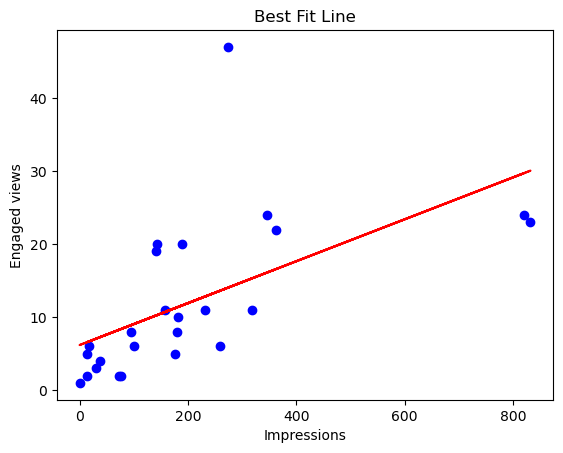

In [350]:
# best fit line
import matplotlib.pyplot as plt

plt.scatter(X_train[["Impressions"]], y_train, color='blue')
plt.plot(X_train[["Impressions"]], lin_reg1.predict(X_train[["Impressions"]]), color='red')
plt.title('Best Fit Line')
plt.xlabel('Impressions')
plt.ylabel('Engaged views')
plt.show()


In [351]:
pred = lin_reg1.predict(X_train[["Impressions"]])
rmse = np.sqrt(mean_squared_error(y_train, pred))  # to compute RMSE
mae = mean_absolute_error(y_train, pred)  # to compute MAE
mape = np.mean(np.abs(y_train - pred) / y_train) * 100  # to compute MAPE
r2 = r2_score(y_train, pred)  # to compute R-squared
n = X_train.shape[0]
k = X_train[["Impressions"]].shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adjusted_r2,
        },
        index=[0],
    )


Simple Linear Regression Duration Vs Engaged Views

In [352]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train[["Duration"]], y_train)

LinearRegression()

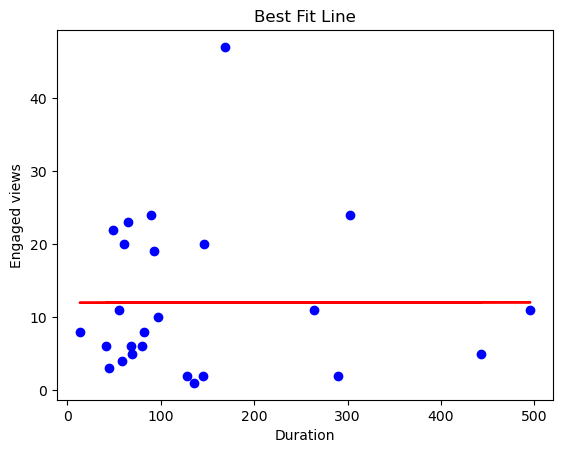

In [353]:
# best fit line
import matplotlib.pyplot as plt

plt.scatter(X_train[["Duration"]], y_train, color='blue')
plt.plot(X_train[["Duration"]], lin_reg2.predict(X_train[["Duration"]]), color='red')
plt.title('Best Fit Line')
plt.xlabel('Duration')
plt.ylabel('Engaged views')
plt.show()


In [354]:
pred = lin_reg2.predict(X_train[["Duration"]])
rmse = np.sqrt(mean_squared_error(y_train, pred))  # to compute RMSE
mae = mean_absolute_error(y_train, pred)  # to compute MAE
mape = np.mean(np.abs(y_train - pred) / y_train) * 100  # to compute MAPE
r2 = r2_score(y_train, pred)  # to compute R-squared
n = X_train.shape[0]
k = X_train[["Duration"]].shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
df_perf = pd.concat([df_perf, pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adjusted_r2,
        },
        index=[1],
    )])


Simple Linear Regression Engaged Views Vs Video publish day

In [355]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X_train[["Video publish day"]], y_train)

LinearRegression()

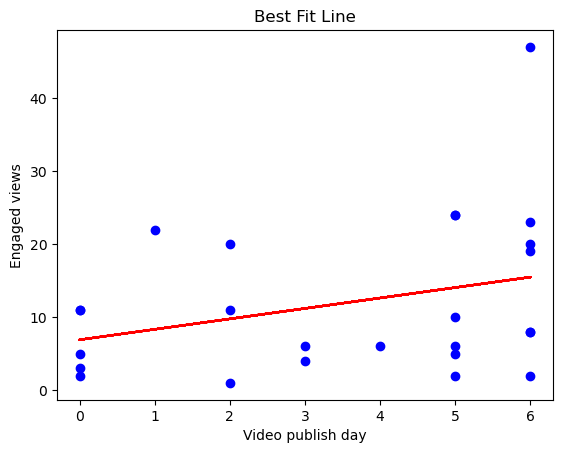

In [356]:
# best fit line
import matplotlib.pyplot as plt

plt.scatter(X_train[["Video publish day"]], y_train, color='blue')
plt.plot(X_train[["Video publish day"]], lin_reg3.predict(X_train[["Video publish day"]]), color='red')
plt.title('Best Fit Line')
plt.xlabel('Video publish day')
plt.ylabel('Engaged views')
plt.show()


In [357]:
pred = lin_reg3.predict(X_train[["Video publish day"]])
rmse = np.sqrt(mean_squared_error(y_train, pred))  # to compute RMSE
mae = mean_absolute_error(y_train, pred)  # to compute MAE
mape = np.mean(np.abs(y_train - pred) / y_train) * 100  # to compute MAPE
r2 = r2_score(y_train, pred)  # to compute R-squared
n = X_train.shape[0]
k = X_train[["Video publish day"]].shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
df_perf = pd.concat([df_perf, pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adjusted_r2,
        },
        index=[2],
    )])


Multiple Linear Regression Engaged Views Vs Categories

In [358]:
lin_reg4 = LinearRegression()
lin_reg4.fit(X_train[["Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]], y_train)

LinearRegression()

Perf Evaluation

Training set performance

In [359]:
pred = lin_reg4.predict(X_train[["Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]])
rmse = np.sqrt(mean_squared_error(y_train, pred))  # to compute RMSE
mae = mean_absolute_error(y_train, pred)  # to compute MAE
mape = np.mean(np.abs(y_train - pred) / y_train) * 100  # to compute MAPE
r2 = r2_score(y_train, pred)  # to compute R-squared
n = X_train.shape[0]
k = X_train[["Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]].shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
df_perf = pd.concat([df_perf, pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adjusted_r2,
        },
        index=[3],
    )])


In [360]:
lin_reg5 = LinearRegression()
lin_reg5.fit(X_train[["Impressions","Duration","Video publish day", "Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]], y_train)

LinearRegression()

In [361]:
pred = lin_reg5.predict(X_train[["Impressions","Duration","Video publish day", "Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]])
rmse = np.sqrt(mean_squared_error(y_train, pred))  # to compute RMSE
mae = mean_absolute_error(y_train, pred)  # to compute MAE
mape = np.mean(np.abs(y_train - pred) / y_train) * 100  # to compute MAPE
r2 = r2_score(y_train, pred)  # to compute R-squared
n = X_train.shape[0]
k = X_train[["Impressions","Duration","Video publish day", "Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]].shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
df_perf = pd.concat([df_perf, pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adjusted_r2,
        },
        index=[4],
    )])


Test Performance

In [362]:
pred = lin_reg1.predict(X_test[["Impressions"]])
rmse = np.sqrt(mean_squared_error(y_test, pred))  # to compute RMSE
mae = mean_absolute_error(y_test, pred)  # to compute MAE
mape = np.mean(np.abs(y_test - pred) / y_test) * 100  # to compute MAPE
r2 = r2_score(y_test, pred)  # to compute R-squared
n = X_test.shape[0]
k = X_test[["Impressions"]].shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

df_perf_test =  pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adjusted_r2,
        },
        index=[0],
    )


In [363]:
pred = lin_reg2.predict(X_test[["Duration"]])
rmse = np.sqrt(mean_squared_error(y_test, pred))  # to compute RMSE
mae = mean_absolute_error(y_test, pred)  # to compute MAE
mape = np.mean(np.abs(y_test - pred) / y_test) * 100  # to compute MAPE
r2 = r2_score(y_test, pred)  # to compute R-squared
n = X_test.shape[0]
k = X_test[["Duration"]].shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

df_perf_test =  pd.concat([df_perf, pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adjusted_r2,
        },
        index=[1],
    )])


In [367]:
pred = lin_reg3.predict(X_test[["Video publish day"]])
rmse = np.sqrt(mean_squared_error(y_test, pred))  # to compute RMSE
mae = mean_absolute_error(y_test, pred)  # to compute MAE
mape = np.mean(np.abs(y_test - pred) / y_test) * 100  # to compute MAPE
r2 = r2_score(y_test, pred)  # to compute R-squared
n = X_test.shape[0]
k = X_test[["Video publish day"]].shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

df_perf_test =  pd.concat([df_perf, pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adjusted_r2,
        },
        index=[2],
    )])


In [368]:
pred = lin_reg4.predict(X_test[["Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]])
rmse = np.sqrt(mean_squared_error(y_test, pred))  # to compute RMSE
mae = mean_absolute_error(y_test, pred)  # to compute MAE
mape = np.mean(np.abs(y_test - pred) / y_test) * 100  # to compute MAPE
r2 = r2_score(y_test, pred)  # to compute R-squared
n = X_test.shape[0]
k = X_test[["Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]].shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

df_perf_test = pd.concat([df_perf, pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adjusted_r2,
        },
        index=[3],
    )])


In [370]:
pred = lin_reg5.predict(X_test[["Impressions","Duration","Video publish day", "Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]])
rmse = np.sqrt(mean_squared_error(y_test, pred))  # to compute RMSE
mae = mean_absolute_error(y_test, pred)  # to compute MAE
mape = np.mean(np.abs(y_test - pred) / y_test) * 100  # to compute MAPE
r2 = r2_score(y_test, pred)  # to compute R-squared
n = X_test.shape[0]
k = X_test[["Impressions","Duration","Video publish day","Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]].shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

df_perf_test =  pd.concat([df_perf, pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adjusted_r2,
        },
        index=[4],
    )])



In [371]:
df_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,8.493257,5.878624,95.479072,3.374778e-01,0.308673
1,10.434554,8.240863,168.487624,8.196593e-07,-0.043477
2,9.902957,8.018305,156.444388,9.929685e-02,0.060136
3,7.948657,5.490286,84.752225,4.197176e-01,0.303661
4,5.897809,4.189946,52.893224,6.805277e-01,0.548980


In [372]:
df_perf_test

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,8.493257,5.878624,95.479072,3.374778e-01,0.308673
1,10.434554,8.240863,168.487624,8.196593e-07,-0.043477
2,9.902957,8.018305,156.444388,9.929685e-02,0.060136
3,7.948657,5.490286,84.752225,4.197176e-01,0.303661
4,5.897809,4.189946,52.893224,6.805277e-01,0.548980
4,4.072611,3.728859,93.172456,9.091531e-02,6.454508


In [412]:
datatest = pd.DataFrame({
    "Impressions": [100],
    "Duration": [200],
    "Video publish day": 5,
    "Categories_AI-Companies": [0],
    "Categories_AI-Concepts": [0],
    "Categories_AI-Intro": [0],
    "Categories_AI-News": [1]
    })

In [413]:
pred = lin_reg5.predict(datatest[["Impressions","Duration","Video publish day", "Categories_AI-Companies","Categories_AI-Concepts","Categories_AI-Intro","Categories_AI-News"]])

In [414]:
pred

array([2.80363619])

Findings

* The Multiple linear regression model seems to be predicting well
* When comparing the metrics the performance of the model seems to be better and it adopts somewhat with the change 